In [22]:
from random import random
from numpy import array
from numpy import cumsum
from matplotlib import pyplot
from pandas import DataFrame
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import TimeDistributed
from keras.layers import Bidirectional

# create a sequence classification instance
def get_sequence(n_timesteps):
	# create a sequence of random numbers in [0,1]
	X = array([random() for _ in range(n_timesteps)])
	# calculate cut-off value to change class values
	limit = n_timesteps/4.0
	# determine the class outcome for each item in cumulative sequence
	y = array([0 if x < limit else 1 for x in cumsum(X)])
	# reshape input and output data to be suitable for LSTMs
	X = X.reshape(1, n_timesteps, 1)
	y = y.reshape(1, n_timesteps, 1)
	return X, y

In [23]:
# create traditional lstm model to compare
def get_lstm_model(n_timesteps, backwards):
	model = Sequential()
	model.add(LSTM(20, input_shape=(n_timesteps, 1), return_sequences=True, go_backwards=backwards))
	model.add(TimeDistributed(Dense(1, activation='sigmoid')))
	model.compile(loss='binary_crossentropy', optimizer='adam')
	return model

In [24]:
# create bidirectional lstm model
def get_bi_lstm_model(n_timesteps, mode):
	model = Sequential()
	model.add(Bidirectional(LSTM(20, return_sequences=True), input_shape=(n_timesteps, 1), merge_mode=mode))
	model.add(TimeDistributed(Dense(1, activation='sigmoid')))
	model.compile(loss='binary_crossentropy', optimizer='adam')
	return model

In [39]:
# training the model
def train_model(model, n_timesteps):
    loss = list()
    for _ in range(250):
        # generate new random sequence
        X,y = get_sequence(n_timesteps)
        # fit model for one epoch on this sequence
        hist = model.fit(X, y, epochs=1, batch_size=1, verbose=0)
        loss.append(hist.history['loss'][0])
        print(hist.history['loss'][0])
    for i in range(n_timesteps):
        print('Expected:', y[0, i], 'Predicted', yhat[0, i])    
    return loss

In [40]:
# define problem properties
n_timesteps = 20
results = DataFrame()

In [41]:
# lstm forwards
model = get_lstm_model(n_timesteps, False)
results['lstm_forw'] = train_model(model, n_timesteps)

0.689266502857
0.684503674507
0.689194202423
0.677670717239
0.68506872654
0.678847908974
0.704217195511
0.676168382168
0.69214963913
0.691595971584
0.665586352348
0.671357810497
0.666058003902
0.669109106064
0.652204036713
0.658842802048
0.649710536003
0.664665579796
0.671688079834
0.652028560638
0.662325203419
0.640219867229
0.659687161446
0.630949139595
0.655353248119
0.679328799248
0.642937779427
0.593232750893
0.619406878948
0.582647919655
0.675975799561
0.634671807289
0.601414501667
0.616608917713
0.630093216896
0.583133935928
0.629463255405
0.598516583443
0.583492159843
0.543972611427
0.532327473164
0.585147440434
0.678133368492
0.657743573189
0.612887680531
0.532318174839
0.567458033562
0.603006720543
0.685788810253
0.559682965279
0.856902301311
0.540258407593
0.594798505306
0.523829936981
0.659924864769
0.534348845482
0.477092117071
0.509498298168
0.50532579422
0.5712672472
0.572549283504
0.699677348137
0.493339687586
0.715061545372
0.617023944855
0.498895943165
0.646766245365


In [42]:
# lstm backwards
model = get_lstm_model(n_timesteps, True)
results['lstm_back'] = train_model(model, n_timesteps)

0.672838330269
0.655734837055
0.708895027637
0.684448897839
0.699831366539
0.684327721596
0.712285399437
0.670564651489
0.663181066513
0.644650936127
0.70568883419
0.659168839455
0.69405734539
0.688498854637
0.657122969627
0.651260256767
0.684681892395
0.676822960377
0.6515853405
0.648882746696
0.697543740273
0.665867209435
0.641205966473
0.636524498463
0.729794025421
0.650559127331
0.634862661362
0.740087211132
0.639662563801
0.631206333637
0.655600309372
0.601239800453
0.611062884331
0.590806603432
0.632803976536
0.71449649334
0.626986443996
0.745681643486
0.687162101269
0.741303324699
0.65439760685
0.5760679245
0.636688292027
0.578674137592
0.565736830235
0.688266634941
0.638797938824
0.633578658104
0.674370467663
0.766020655632
0.619321227074
0.621794342995
0.628667652607
0.548573970795
0.530403614044
0.517480015755
0.616266429424
0.508412063122
0.605481743813
0.644765257835
0.577793359756
0.577665805817
0.597088515759
0.656605482101
0.501866698265
0.447639793158
0.511305749416
0.4

In [43]:
# bidirectional concat
model = get_bi_lstm_model(n_timesteps, 'concat')
results['bilstm_con'] = train_model(model, n_timesteps)

0.712695240974
0.710449039936
0.72019547224
0.709672808647
0.710070192814
0.690618038177
0.700676560402
0.696663618088
0.706492304802
0.695335030556
0.696741223335
0.695284485817
0.685120224953
0.688433289528
0.680812716484
0.69349861145
0.684037089348
0.678621768951
0.683170199394
0.682152509689
0.669232606888
0.672972500324
0.674587845802
0.666152834892
0.664858698845
0.668838858604
0.656829535961
0.665061891079
0.653933644295
0.655300498009
0.653742909431
0.652520537376
0.643148541451
0.645325303078
0.643917858601
0.62322807312
0.627024292946
0.672639727592
0.623699128628
0.636295795441
0.622574448586
0.613271832466
0.612693607807
0.608006358147
0.61558675766
0.609898269176
0.596699416637
0.577874302864
0.582660198212
0.597143232822
0.592841088772
0.564585983753
0.591283917427
0.572129368782
0.522575080395
0.577063024044
0.539536356926
0.573601722717
0.541188359261
0.562474250793
0.507758140564
0.527613520622
0.495008468628
0.46769785881
0.513761639595
0.46050620079
0.476263701916
0

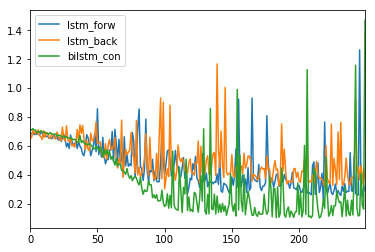

In [44]:
# line plot of results
results.plot()
pyplot.show()

Expected: [0] Predicted [0]
Expected: [0] Predicted [0]
Expected: [0] Predicted [0]
Expected: [0] Predicted [0]
Expected: [0] Predicted [0]
Expected: [1] Predicted [1]
Expected: [1] Predicted [1]
Expected: [1] Predicted [1]
Expected: [1] Predicted [1]
Expected: [1] Predicted [1]
